# Fire

Explore the problem in following stages:
1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 5. Model Building

In [2]:
import pandas as pd

In [14]:
df = pd.read_csv("../../data/SQL/fires_clean.csv", index_col = 0)

In [15]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,OWNER_CODE,OWNER_DESCR,STATE,Shape,DISC_GREG_DATE,CONT_GREG_DATE,DISC_MONTH,DISC_DAY,DISC_DAYOFWEEK,FIRE_DURATION
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12 00:00:00.000000000,5,12,2,0
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,13.0,STATE OR PRIVATE,CA,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...,2004-05-31,2004-05-31 00:00:00.000000000,5,31,0,0
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...,2004-06-28,2004-07-03 00:00:00.000000000,6,28,0,5
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...,2004-06-28,2004-07-03 00:00:00.000000000,6,28,0,5
5,6,6,FS-1418849,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,5.0,USFS,CA,b'\x00\x01\xad\x10\x00\x00\xf0<~\x90\xa1\x06^\...,2004-06-30,2004-07-01 00:00:00.000000000,6,30,2,1


#### For the basemodel, we will just drop all objects and any categorical features

In [17]:
df.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
FIRE_NAME                      object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
FIRE_SIZE                     float64
FIRE_SIZE_CLASS                object
LATITUDE                      float64
LONGITUDE                     float64
OWNER_CODE                    float64
OWNER_DESCR                    object
STATE                          object
Shape                          object
DISC_GREG_DATE                 object
CONT_GREG_DATE                 object
DISC_MONTH  

In [21]:
df_base = df[['FIRE_YEAR', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DISC_MONTH', 'DISC_DAY', 'FIRE_DURATION', 'DISC_DAYOFWEEK']]

### Check that all is clean

In [22]:
df_base.dtypes

FIRE_YEAR            int64
DISCOVERY_DOY        int64
STAT_CAUSE_CODE    float64
FIRE_SIZE          float64
LATITUDE           float64
LONGITUDE          float64
DISC_MONTH           int64
DISC_DAY             int64
FIRE_DURATION        int64
DISC_DAYOFWEEK       int64
dtype: object

In [29]:
df_base.shape

(205299, 10)

### Baseline Model
- using only the date, size, duration, and location of fire

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_base.drop('STAT_CAUSE_CODE', axis = 1)
y = df_base['STAT_CAUSE_CODE']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

since we only have numeric features the pipeline is simple

In [28]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), ('scaling', StandardScaler())])

pipeline = Pipeline([('preprocessing', numeric_transform), ('model', RandomForestClassifier())])

pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)          
print(f'Test set score: {score}')

Test set score: 0.6477837311251826


In [ ]:
#Try another algorithm

### Basemodel Results

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

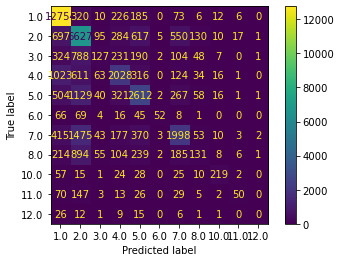

In [33]:
y_pred = pipeline.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

looks like it didn't predict any STAT_CAUSE_CODE 12 (structure)